### Steps

1.  Data Loading and Preprocessing:
      Combine the data loading and preprocessing steps from both notebooks. This includes reading the headline dataset, cleaning the data (if necessary), and preparing it for further processing.

2.  Tokenization:
      Implement BERT tokenization for the headline text data. You can use the tokenization approach from either notebook or customize it based on your preferences.

3.  Model Building:
      Create a unified model-building section where you define the architecture for the BERT model. This includes specifying the layers for the BERT model (e.g., input layer, BERT encoder layer, additional dense layers, output layer).
      Decide whether to fine-tune the BERT model or use it as a feature extractor. If fine-tuning, include the necessary code for training the model with sarcasm detection labels.

4.  Model Evaluation:
      Combine the model evaluation sections from both notebooks. This involves training the model (if necessary) and evaluating its performance using appropriate metrics such as accuracy, precision, recall, and F1-score.
      Use a validation set to assess the model's performance and tune hyperparameters if needed.

5.  Comparison and Analysis:
      After training and evaluating the model, compare its performance with other models you're considering (e.g., RandomForest, SVM, LSTM).
      Analyze the results to determine the effectiveness of the BERT model for sarcasm detection compared to other models.

6.  Finalizing the Pipeline:
      Once you're satisfied with the performance of the BERT model, finalize the pipeline by including any additional steps necessary for deployment or further analysis.
      You may want to save the trained model weights, tokenizer, and other relevant artifacts for future use.

Importing libraries (from notebook1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
from wordcloud import WordCloud
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

Data processing (from notebook 1)

In [ ]:
import json, os
import pandas as pd

# Data Preprocessing
import numpy as np
%pip install transformers
!pip install wordcloud
!pip install nltk
!pip install seaborn
!pip install gensim
!pip install transformers==4.37.2 # Added to solve the error at the embedding step
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import re, nltk, string

# for LSTM
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
import keras
from gensim.models import KeyedVectors
import random



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


Data processing from notebook 2

In [ ]:
# Data Preprocessing
!pip install nltk
!pip install gensim
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import re, nltk, string

# for LSTM
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
import keras
from gensim.models import KeyedVectors
import random

Reading data (from notebook2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
data = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines = True)
data.head() # check the data

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
data.drop(columns="article_link", axis=1, inplace=True) # drop the column containing article links since we don't need them in our analysis
data.head(5)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


Data cleanup (from notebook2)

In [ ]:
# Inspect whether the are duplicates
len(data['headline'])-len(data['headline'].drop_duplicates())

# Remove duplicates
data = data.drop_duplicates(subset = 'headline')
data.describe()

,is_sarcastic
count,28503.000000
mean,0.475459
std,0.499406
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Sentence splitting (from notebook2)
  - Inspecting sentences length: tokenization and number of words

In [ ]:
tokenize = Tokenizer(oov_token="<oov>") # creating Keras Tokenizer object
tokenize.fit_on_texts(data['headline']) # build the vocabulary based on the unique words in X_long
word_idx = tokenize.word_index #  mapping words to their respective integer indices, from the fitted tokenizer
data['headline_sequence'] = tokenize.texts_to_sequences(data['headline']) # convert headlines into integer sequences using the word index
data['length'] = data['headline_sequence'].apply(len) # calculate the number of words in each headline

data = data.sort_values(by='length')
data.head()

,is_sarcastic,headline,headline_sequence,length
27120,0,explosive illusions,"[7127, 15685]",2
21220,0,another opportunity,"[208, 2264]",2
1566,1,willow rented,"[11866, 5736]",2
17383,1,ant born,"[7245, 1960]",2
17980,0,magical marseille,"[1467, 25325]",2


In [ ]:
data.tail() # we can see one huge outlier consisting of 152 words

,is_sarcastic,headline,headline_sequence,length
20776,0,"'how do we treat the little people, joan?' i a...","[4544, 97, 94, 2385, 4, 159, 67, 3268, 70, 82,...",31
23598,0,occasionally you realize someone you thought w...,"[15801, 20, 1598, 510, 20, 482, 75, 7, 1510, 3...",38
24815,1,"elmore leonard, modern prose master, noted for...","[28847, 7824, 1530, 9443, 3399, 11386, 6, 31, ...",39
16588,1,"'12 years a slave,' 'captain phillips,' 'ameri...","[15162, 104, 7, 5118, 70, 6034, 24623, 70, 213...",40
7302,1,hot wheels ranked number one toy for rolling d...,"[420, 3348, 6462, 818, 43, 2634, 6, 3273, 78, ...",152


  - visual inspection

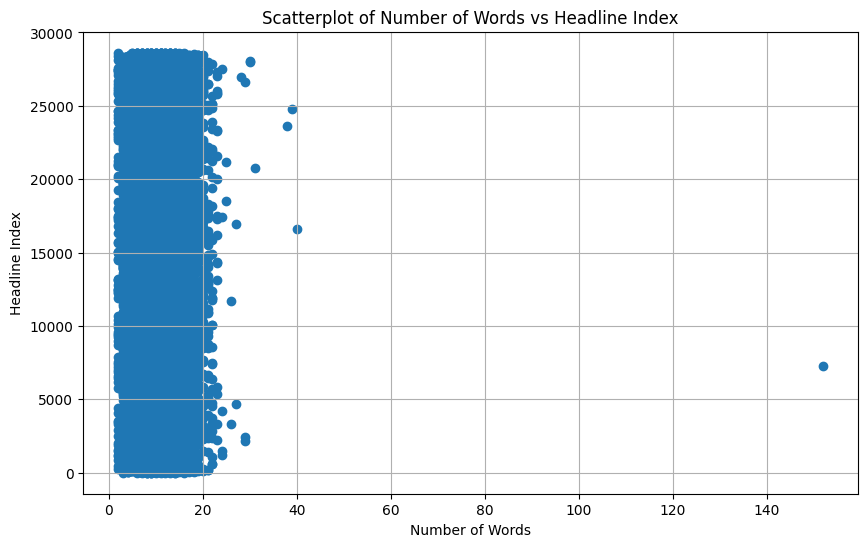

               length                                                 
                count       mean       std  min  25%   50%   75%   max
is_sarcastic                                                          
0             14947.0   9.967351  2.897856  2.0  8.0  10.0  12.0  25.0
1             13541.0  10.578835  3.659179  2.0  8.0  10.0  13.0  25.0


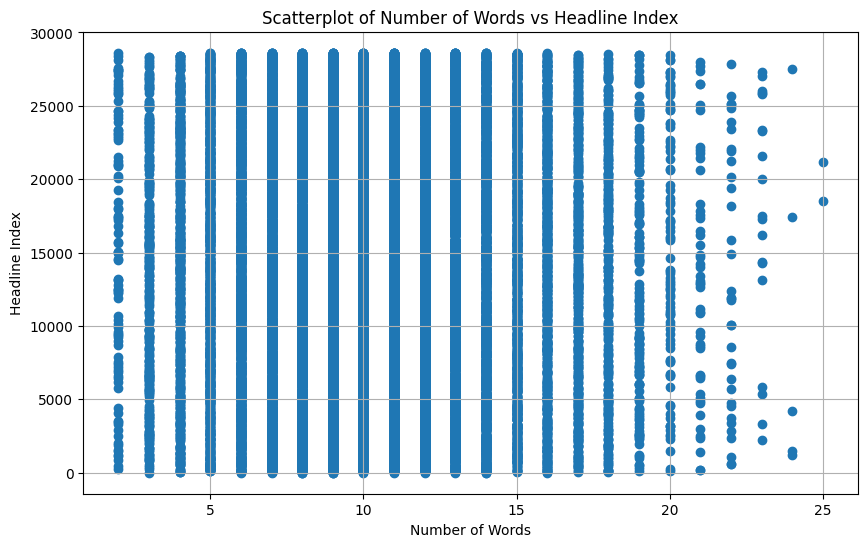

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['length'], data.index)
plt.title('Scatterplot of Number of Words vs Headline Index')
plt.xlabel('Number of Words')
plt.ylabel('Headline Index')
plt.grid(True)
plt.show()

# we wil consider headlines longer than 25 words as outliers and thus remove them
data_clean = data[data['length'] <= 25]

# the removal of outlier has no significant consequences for data characteristics
print(data_clean.groupby("is_sarcastic").describe())
# plot the scatterplot again, now without the outliers
plt.figure(figsize=(10, 6))
plt.scatter(data_clean['length'], data_clean.index)
plt.title('Scatterplot of Number of Words vs Headline Index')
plt.xlabel('Number of Words')
plt.ylabel('Headline Index')
plt.grid(True)
plt.show()

  - Splitting data into short headlines dataset and long headlines dataset; splitting data into X and Y

In [ ]:
data_clean['length'].median()

data_short = data_clean[data_clean['length'] <= data_clean['length'].median()]
data_long = data_clean[data_clean['length'] > data_clean['length'].median()]

print(data_short.groupby("is_sarcastic").describe(), data_long.groupby("is_sarcastic").describe())

              length                                               
               count      mean       std  min  25%  50%   75%   max
is_sarcastic                                                       
0             8386.0  7.959218  1.905585  2.0  7.0  8.0  10.0  10.0
1             7105.0  7.757635  1.830771  2.0  7.0  8.0   9.0  10.0               length                                                   
               count       mean       std   min   25%   50%   75%   max
is_sarcastic                                                           
0             6561.0  12.534065  1.657422  11.0  11.0  12.0  13.0  25.0
1             6436.0  13.693288  2.446206  11.0  12.0  13.0  15.0  25.0


In [ ]:
X_long = data_long['headline']
label_long = to_categorical(data_long["is_sarcastic"], 2)

X_short = data_short['headline']
label_short = to_categorical(data_short['is_sarcastic'], 2)

data_long # check the data

,is_sarcastic,headline,headline_sequence,length
23964,0,"in 'margaritaville,' broadway's lisa howard fi...","[5, 28416, 70, 14820, 4960, 3101, 109, 2831, 9...",11
12439,0,"arcade fire, bon iver, strokes form supergroup...","[22513, 309, 7655, 22514, 10965, 1514, 14477, ...",11
10195,0,club for growth attacks donald trump with new ...,"[1300, 6, 3047, 569, 54, 13, 10, 12, 2758, 5, ...",11
7922,0,proof that human alex jones is most certainly ...,"[1963, 26, 359, 2550, 1140, 11, 99, 10494, 29,...",11
22797,1,90% of audience at college graduation involved...,"[1604, 3, 841, 15, 212, 3448, 3624, 5, 7646, 9...",11
...,...,...,...,...
1449,1,man at park who set up table full of water cup...,"[14, 15, 962, 37, 488, 22, 866, 362, 3, 426, 3...",24
17412,1,house chaplain delivers soulful prayer for god...,"[69, 8045, 1705, 10655, 4823, 6, 252, 2, 469, ...",24
4182,1,high school kicker finds it helpful to imagine...,"[158, 100, 12608, 109, 27, 6058, 2, 3491, 912,...",24
18517,1,"unearthed cave painting of wooly mammoth, sabe...","[15419, 4635, 4660, 3, 25625, 25626, 15420, 53...",25


Model training (fron notebook2)

In [ ]:
Y_long = data_long["is_sarcastic"]
Y_short = data_short['is_sarcastic']

In [ ]:
X_long_padded = pad_sequences(data_long['headline_sequence'], padding="pre")

X_long_train, X_long_test, y_long_train, y_long_test = train_test_split(
    X_long_padded,
    Y_long,
    random_state = 0,  # seed for reproducibility
    stratify = Y_long  # ensures that the class distribution is maintained in splits
)

In [ ]:
X_short_padded = pad_sequences(data_short['headline_sequence'], padding="pre")

X_short_train, X_short_test, y_short_train, y_short_test = train_test_split(
    X_short_padded,
    Y_short,
    random_state=0,  # seed for reproducibility
    stratify=Y_short  # ensures that the class distribution is maintained in splits
    )

In [ ]:
embeddings_file = "glove.twitter.27B.200d.txt"

def get_coefs(word, *array): # function to parse lines in the embeddings file
    return word, np.asarray(array, dtype='float32')

with open(embeddings_file, 'r', encoding='utf-8') as f: # opens the txt file in read mode with UTF-8 encoding
    embeddings_dict = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in f) # for each line from the file, strip any trailing whitespaces, splits the line into a list of values, uses get_coefs

In [ ]:
all_embs = np.stack(list(embeddings_dict.values())) # stack the word embeddings into a single NumPy array
emb_mean, emb_std = all_embs.mean(), all_embs.std()
emb_size = all_embs.shape[1] # dimensionality of the word embeddings that we chose, i.e., 200

print(emb_mean)
print(emb_std)
print(emb_size)

0.009065018
0.4428109
200


In [ ]:
max_tokens = 35000 # the maximum number of unique tokens to consider
unique_words = min(max_tokens, len(word_idx)) #  the number of unique words to be considered in our case
unique_words = len(word_idx) + 1  # add 1 for the out-of-vocabulary token

embedding_matrix = np.random.normal(emb_mean, emb_std, (unique_words, emb_size)) #  initialize matrix with random values drawn from a normal distribution. The matrix has dimensions [unique_words, emb_size]
for word, i in word_idx.items():
    if i >= unique_words: continue # only 30886 are going to be considered
    embedding_vector = embeddings_dict.get(word) # retrieve embedding vector for current word
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

###  4.1.3. Building models
We are now all set for building two distinctive models to handle long and short headlines. The only difference between these models lies in the input length defined within the embedding layer, stemming from the differing padding applied to the long vs. short headlines data. First, we create the model tailored for long headlines, followed by the model for short ones.

In [ ]:
random.seed(2023)
model_long = Sequential()
model_long.add(Embedding(input_dim = unique_words,
                    output_dim = emb_size,
                    weights = [embedding_matrix],
                    input_length = 25, # each sentence was padded to the length of 25 tokens
                    trainable = True))
model_long.add(Bidirectional(LSTM(units = 128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model_long.add(Dense(1, activation = 'sigmoid')) # binary classification

model_long.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
random.seed(2023)
model_short = Sequential()
model_short.add(Embedding(input_dim = unique_words,
                    output_dim = emb_size,
                    weights = [embedding_matrix],
                    input_length = 10, # each sentence was padded to the length of 10 tokens
                    trainable = True))
model_short.add(Bidirectional(LSTM(units = 128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model_short.add(Dense(1, activation = 'sigmoid')) # binary classification

model_short.compile(optimizer=keras.optimizers.legacy.Adam(lr = 0.01), loss = 'binary_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### 4.1.4. Training
Here we train the model using the long headlines data, and then we repeat the same training process with the short headlines data.

In [ ]:
# Train long headlines dataset
history_long = model_long.fit(
    X_long_train,
    y_long_train,
    batch_size = 128,
    validation_data = (X_long_test, y_long_test),
    epochs = 2
)

Epoch 1/2
77/77 [==============================] - 56s 611ms/step - loss: 0.4857 - acc: 0.7710 - val_loss: 0.2606 - val_acc: 0.9009
Epoch 2/2
77/77 [==============================] - 50s 649ms/step - loss: 0.1553 - acc: 0.9433 - val_loss: 0.2943 - val_acc: 0.8880


In [ ]:
# Train short headlines dataset
history_short = model_short.fit(
    X_short_train,
    y_short_train,
    batch_size = 128,
    validation_data = (X_short_test, y_short_test),
    epochs=2)

Epoch 1/2
91/91 [==============================] - 75s 684ms/step - loss: 0.4508 - acc: 0.7824 - val_loss: 0.3274 - val_acc: 0.8588
Epoch 2/2
91/91 [==============================] - 39s 431ms/step - loss: 0.1556 - acc: 0.9420 - val_loss: 0.4165 - val_acc: 0.8477


In [ ]:
# For newer versions of Keras/TensorFlow
lstm_short_val_acc = round(history_short.history['val_acc'][-1]*100, 2)
lstm_long_val_acc = round(history_long.history['val_acc'][-1]*100, 2)

# Print the final validation accuracies
print(lstm_short_val_acc, lstm_long_val_acc)

84.77 88.8


In [ ]:
from sklearn.metrics import classification_report

# Previsioni del modello LSTM su dati di test (o validazione)
y_pred_long = model_long.predict(X_long_test)
y_pred_short = model_short.predict(X_short_test)

# Calcolo delle metriche per i dati lunghi
print("Long Sentences:")
print(classification_report(y_long_test, y_pred_long))

# Calcolo delle metriche per i dati corti
print("Short Sentences:")
print(classification_report(y_short_test, y_pred_short))


122/122 [==============================] - 2s 12ms/step
Long Sentences:


ValueError: Classification metrics can't handle a mix of binary and continuous targets

## 4.2. BERT-Base

### 4.2.1. BERT-specific data preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'headline' is the feature and 'is_sarcastic' is the label column
X_long = data_long['headline']
Y_long = data_long['is_sarcastic']
X_short = data_short["headline"]
Y_short = data_short['is_sarcastic']

# Split the data into training and testing sets
X_long_train, X_long_test, Y_long_train, Y_long_test = train_test_split(X_long, Y_long, test_size=0.2)
X_short_train, X_short_test, Y_short_train, Y_short_test = train_test_split(X_short, Y_short, test_size=0.2)

# Use LabelEncoder to convert labels to integers (0 or 1)
label_encoder = LabelEncoder()
Y_long_train_encoded = label_encoder.fit_transform(Y_long_train)
Y_long_test_encoded = label_encoder.transform(Y_long_test)
Y_short_train_encoded = label_encoder.fit_transform(Y_short_train)
Y_short_test_encoded = label_encoder.transform(Y_short_test)


In [ ]:
#BERT TOKENIZATION
pretrained = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(pretrained,do_lower_case = True)

def encoder(sentences):
  ids = []
  for sentence in sentences:
    encoding = tokenizer.encode_plus(
    sentence,
    max_length=16,
    truncation = True,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=False)
    ids.append(encoding['input_ids'])
  return ids

#tokenization
x_long_train_ids = encoder(X_long_train)
x_long_test_ids = encoder(X_long_test)
x_short_train_ids = encoder(X_short_train)
x_short_test_ids = encoder(X_short_test)


#DATA TRANSFORMATION

#converting arrays to tensors
#long headlines
x_long_train_ids = tf.convert_to_tensor(x_long_train_ids)
x_long_test_ids = tf.convert_to_tensor(x_long_test_ids)
y_long_test = tf.convert_to_tensor(Y_long_test_encoded)
y_long_train = tf.convert_to_tensor(Y_long_train_encoded)

#short headlines
x_short_train_ids = tf.convert_to_tensor(x_short_train_ids)
x_short_test_ids = tf.convert_to_tensor(x_short_test_ids)
y_short_test = tf.convert_to_tensor(Y_short_test_encoded)
y_short_train = tf.convert_to_tensor(Y_short_train_encoded)

#### Long sentences BERT model

In [ ]:
#model building with bert (version 12 layer, 768 hidden, 12 heads)
bert_encoder = TFBertModel.from_pretrained('bert-base-uncased')
input_word_ids = tf.keras.Input(shape=(16,), dtype=tf.int32, name="input_word_ids")
input_word_ids_tensor = tf.keras.backend.cast(input_word_ids, tf.int32)  # Convert KerasTensor to TensorFlow Tensor
token_type_ids = tf.fill(tf.shape(input_word_ids), 0)  # Create token_type_ids tensor
embedding = bert_encoder(input_word_ids_tensor, token_type_ids=token_type_ids)  # Pass token_type_ids to the model
dense = tf.keras.layers.Lambda(lambda seq: seq[:, 0, :])(embedding[0])
dense = tf.keras.layers.Dense(128, activation='relu')(dense)
dense = tf.keras.layers.Dropout(0.2)(dense)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=[input_word_ids], outputs=output)

In [ ]:
bert_encoder.trainable = False

In [ ]:
model.compile(tf.keras.optimizers.legacy.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.X_test)
        y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

        precision = precision_score(self.y_test, y_pred_binary)
        recall = recall_score(self.y_test, y_pred_binary)
        f1 = f1_score(self.y_test, y_pred_binary)

        print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

# Definire le callback
metrics_callback_long = MetricsCallback(x_long_test_ids, y_long_test)
metrics_callback_short = MetricsCallback(x_short_test_ids, y_short_test)

In [ ]:
#long model
long_model = model.fit(
    x=x_long_train_ids,
    y=y_long_train,
    epochs=5,
    verbose=1,
    batch_size=32,
    validation_data=(x_long_test_ids, y_long_test),
    callbacks=[metrics_callback_long]
)


#### Short sentences model BERT

In [ ]:
bert_encoder = TFBertModel.from_pretrained('bert-base-uncased')
input_word_ids = tf.keras.Input(shape=(16,), dtype=tf.int32, name="input_word_ids")
embedding = bert_encoder([input_word_ids])
dense = tf.keras.layers.Lambda(lambda seq: seq[:, 0, :])(embedding[0])
dense = tf.keras.layers.Dense(128, activation='relu')(dense)
dense = tf.keras.layers.Dropout(0.2)(dense)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=[input_word_ids], outputs=output)
bert_encoder.trainable = False

model.compile(tf.keras.optimizers.legacy.Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#short model
short_model = model.fit(
    x=x_short_train_ids,
    y=y_short_train,
    epochs=5,
    verbose=1,
    batch_size=32,
    validation_data=(x_short_test_ids, y_short_test),
    callbacks=[metrics_callback_short]
)

RandomForest (from notebook1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define a function to join tokens into a string
def join_tokens(tokens):
    return ' '.join(tokens)

# Instantiate transformers and classifier
vect = CountVectorizer(analyzer=join_tokens)  # Passiamo il tokenizer
tfidf = TfidfTransformer()
clf = RandomForestClassifier()

# Fit and/or transform each to the training data
X_long_train_counts = vect.fit_transform(X_long_train)
X_long_train_tfidf = tfidf.fit_transform(X_long_train_counts)

# Fit or train the classifier
clf.fit(X_long_train_tfidf, y_long_train)

# Transform test data
X_long_test_counts = vect.transform(X_long_test)
X_long_test_tfidf = tfidf.transform(X_long_test_counts)

# Predict test labels
y_pred = clf.predict(X_long_test_tfidf)

print("RandomForest Classifier - Long Sentences:")
print(classification_report(y_long_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_long_test, y_pred))

# Repeat the same process for short sentences
X_short_train_counts = vect.fit_transform(X_short_train)
X_short_train_tfidf = tfidf.fit_transform(X_short_train_counts)

clf.fit(X_short_train_tfidf, y_short_train)

X_short_test_counts = vect.transform(X_short_test)
X_short_test_tfidf = tfidf.transform(X_short_test_counts)

y_pred = clf.predict(X_short_test_tfidf)

print("\nRandomForest Classifier - Short Sentences:")
print(classification_report(y_short_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_short_test, y_pred))




SVM (from notebook1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Instantiate transformers and SVM classifier
vect = CountVectorizer(analyzer=join_tokens)  # Passiamo il tokenizer
tfidf = TfidfTransformer()
svm_model = SVC(kernel='linear', gamma=1)

# Fit and/or transform each to the training data
X_long_train_counts = vect.fit_transform(X_long_train)
X_long_train_tfidf = tfidf.fit_transform(X_long_train_counts)

# Train the SVM model
svm_model.fit(X_long_train_tfidf, y_long_train)

# Transform test data
X_long_test_counts = vect.transform(X_long_test)
X_long_test_tfidf = tfidf.transform(X_long_test_counts)

# Predict test labels
y_pred = svm_model.predict(X_long_test_tfidf)

print("SVM Classifier - Long Sentences:")
print(classification_report(y_long_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_long_test, y_pred))

# Repeat the same process for short sentences
X_short_train_counts = vect.fit_transform(X_short_train)
X_short_train_tfidf = tfidf.fit_transform(X_short_train_counts)

svm_model.fit(X_short_train_tfidf, y_short_train)

X_short_test_counts = vect.transform(X_short_test)
X_short_test_tfidf = tfidf.transform(X_short_test_counts)

y_pred = svm_model.predict(X_short_test_tfidf)

print("\nSVM Classifier - Short Sentences:")
print(classification_report(y_short_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_short_test, y_pred))

